# Plot Posteriors

This notebook uses the public code to plot the posterior distributions from MultiSWAG and pyDelfi

In [3]:
import sys
import torch
import numpy as np
import getdist.plots
from getdist.mcsamples import loadMCSamples
sys.path.append("../cosmoswag") 
from swag import SWAGModel
from cmb_simulator import *

### Load the data and parameters

In [4]:
_, _, x_val, y_val, _ = read_data()
# Get the parameters for validation
params = unnormalize_params(y_val.detach().numpy())

### Load the multiSWAG model and generate samples

In [8]:
nin = x_val.shape[1]
npars = y_val.shape[1]
model = SWAGModel(nin=nin, npars = npars)
model.load("cmb_noiseless.pt")

samples = model.generate_samples(x_val, nsamples=1000, scale=2.5, verbose=True)

Generated 100 samples.
Generated 200 samples.
Generated 300 samples.
Generated 400 samples.
Generated 500 samples.
Generated 600 samples.
Generated 700 samples.
Generated 800 samples.
Generated 900 samples.


### Convert to GetDist for plotting

In [12]:
ind = -1 # Which of the validation simulations to use
samples_cosmo = unnormalize_params(samples[:,ind].detach().numpy())
names = ["H0", "omch2",  "ombh2", "As", "ns"]
labels =  ["H_0", "\Omega_\mathrm{c} h^2", "\Omega_\mathrm{b} h^2", "\log A", "n_s"]
swag = getdist.MCSamples(samples=samples_cosmo,names = names, labels = labels)

Removed no burn in


### Generate plots

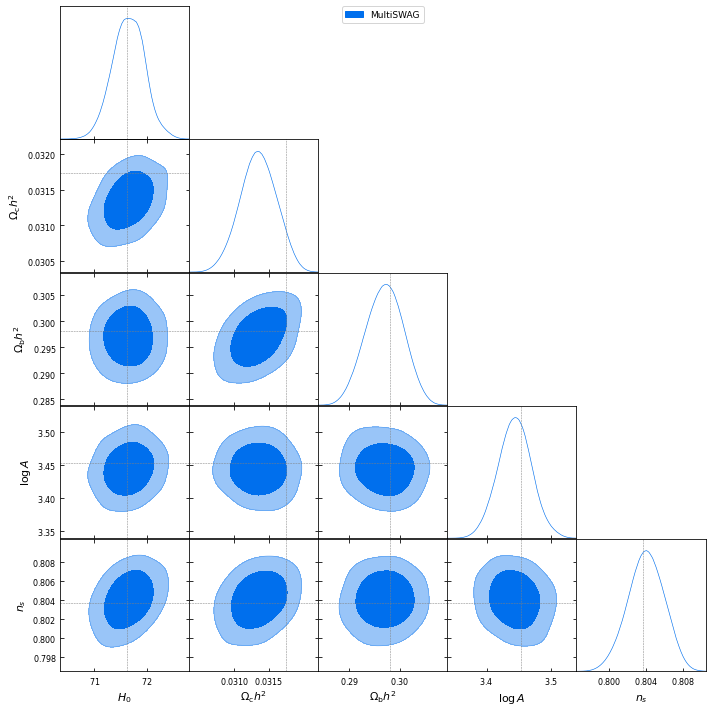

In [13]:
g = getdist.plots.getSubplotPlotter()
g.triangle_plot([swag], 
                ["H0", "omch2",  "ombh2", "As", "ns"], 
                filled=True,
                legend_labels = ['MultiSWAG', 'pyDelfi'],
                markers={'H0':params[ind,0],
                         'omch2':params[ind,1],
                         'ombh2':params[ind,2],
                         'As':params[ind,3],
                         'ns':params[ind,4]}
               )